# Movie Rating Prediction
## !!Disclaimer! Will take approximately 1 hour to run the entire code!!

## Load and observe dataset

### Load csv files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator

# Set default asthetic parameters.
sns.set()

# Define path to data.
movies = pd.read_csv('movies.csv')
links = pd.read_csv('links.csv')
ratings = pd.read_csv('ratings.csv')

### Observe data

In [2]:
movies.head()
#ratings.head()
#links.head()

,id,title,tagline,description,genres,keywords,date,collection,runtime,revenue,...,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,imdb_id,poster_url
0,862,Toy Story,NaN,"Led by Woody, Andy's toys live happily in his ...","animation, comedy, family","jealousy, toy, boy, friendship, friends, rival...",1995-10-30,Toy Story Collection,81.0,373554033.0,...,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",Pixar Animation Studios,United States of America,21.946943,7.7,5415.0,en,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,8844,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"adventure, fantasy, family","board game, disappearance, based on children's...",1995-12-15,NaN,104.0,262797249.0,...,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,17.015539,6.9,2413.0,en,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"romance, comedy","fishing, best friend, duringcreditsstinger, ol...",1995-12-22,Grumpy Old Men Collection,101.0,0.0,...,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Warner Bros., Lancaster Gate",United States of America,11.712900,6.5,92.0,en,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","comedy, drama, romance","based on novel, interracial relationship, sing...",1995-12-22,NaN,127.0,81452156.0,...,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",Twentieth Century Fox Film Corporation,United States of America,3.859495,6.1,34.0,en,tt0114885,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,comedy,"baby, midlife crisis, confidence, aging, daugh...",1995-02-10,Father of the Bride Collection,106.0,76578911.0,...,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...","Sandollar Productions, Touchstone Pictures",United States of America,8.387519,5.7,173.0,en,tt0113041,/e64sOI48hQXyru7naBFyssKFxVd.jpg


In [3]:
movies.info()
#ratings.info()
#links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46628 entries, 0 to 46627
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    46628 non-null  int64  
 1   title                 46624 non-null  object 
 2   tagline               20783 non-null  object 
 3   description           45633 non-null  object 
 4   genres                44104 non-null  object 
 5   keywords              31739 non-null  object 
 6   date                  46540 non-null  object 
 7   collection            4574 non-null   object 
 8   runtime               46360 non-null  float64
 9   revenue               46624 non-null  float64
 10  budget                46628 non-null  int64  
 11  director              45711 non-null  object 
 12  cast                  44137 non-null  object 
 13  production_companies  34346 non-null  object 
 14  production_countries  40132 non-null  object 
 15  popularity         

## Data Preprocessing

### Find average rating and merge data

In [4]:
average_ratings = ratings.groupby(['movieId']).sum()['rating']
average_count = ratings.groupby(['movieId']).count()['rating']
for i in range(len(average_ratings)):
    average_ratings.iloc[i] = average_ratings.iloc[i]/average_count.iloc[i]
average_ratings = pd.DataFrame(average_ratings)
average_ratings = average_ratings[average_ratings['rating'] != 0].merge(links, on='movieId', how="left").rename({'tmdbId':'id'}, axis = 1)
movies = movies.merge(average_ratings, on='id', how="left")
movies.drop(columns = ['tagline', 'description', 'keywords', 'imdbId', 'movieId', 'poster_url', 'imdb_id'], inplace = True)
movies

,id,title,genres,date,collection,runtime,revenue,budget,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,rating
0,862,Toy Story,"animation, comedy, family",1995-10-30,Toy Story Collection,81.0,373554033.0,30000000,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",Pixar Animation Studios,United States of America,21.946943,7.7,5415.0,en,3.888157
1,8844,Jumanji,"adventure, fantasy, family",1995-12-15,NaN,104.0,262797249.0,65000000,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,17.015539,6.9,2413.0,en,3.236953
2,15602,Grumpier Old Men,"romance, comedy",1995-12-22,Grumpy Old Men Collection,101.0,0.0,0,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Warner Bros., Lancaster Gate",United States of America,11.712900,6.5,92.0,en,3.175550
3,31357,Waiting to Exhale,"comedy, drama, romance",1995-12-22,NaN,127.0,81452156.0,16000000,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",Twentieth Century Fox Film Corporation,United States of America,3.859495,6.1,34.0,en,2.875713
4,11862,Father of the Bride Part II,comedy,1995-02-10,Father of the Bride Collection,106.0,76578911.0,0,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...","Sandollar Productions, Touchstone Pictures",United States of America,8.387519,5.7,173.0,en,3.079565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46905,439050,Subdue,"drama, family",NaN,NaN,90.0,0.0,0,Hamid Nematollah,"Leila Hatami, Kourosh Tahami, Elham Korda",NaN,Iran,0.072051,4.0,1.0,fa,3.500000
46906,111109,Century of Birthing,drama,2011-11-17,NaN,360.0,0.0,0,Lav Diaz,"Angel Aquino, Perry Dizon, Hazel Orencio, Joel...",Sine Olivia,Philippines,0.178241,9.0,3.0,tl,5.000000
46907,67758,Betrayal,"action, drama, thriller",2003-08-01,NaN,90.0,0.0,0,Mark L. Lester,"Erika Eleniak, Adam Baldwin, Julie du Page, Ja...",American World Pictures,United States of America,0.903007,3.8,6.0,en,1.000000
46908,227506,Satan Triumphant,NaN,1917-10-21,NaN,87.0,0.0,0,Yakov Protazanov,"Iwan Mosschuchin, Nathalie Lissenko, Pavel Pav...",Yermoliev,Russia,0.003503,0.0,0.0,en,3.000000


### Data Format Modification

In [5]:
def preprocessing(profiles):
    profiles['collection'] = movies['collection'].fillna(0)
    profiles.dropna(inplace = True)
    profiles['genres'] = [i.split(", ") for i in profiles['genres']]
    profiles['date'] = [i[0:4] for i in profiles['date']]
    profiles['collection'] = [1 if i != 0 else 0 for i in profiles['collection']]
    all_cast = []
    for i in profiles['cast']:
        tmp = []
        for j in i.split(', '):
            tmp.append(j.strip())
        all_cast.append(tmp)
    profiles['cast'] = all_cast
    profiles['production_companies'] = [i.split(", ") for i in profiles['production_companies']]
    # profiles['production_countries'] = [len(i.split(", ")) for i in profiles['production_countries']]
    profiles['production_countries'] = [i.split(", ") for i in profiles['production_countries']]
    profiles['language'] = [1 if i == 'en' else 0 for i in profiles['language']]
    profiles.rename (columns= { 'average_vote': 'Rating', 'rating': 'other_rating' }, inplace = True) 
    return profiles.dropna()

## Feature Selection

### Initialization

In [6]:
# initializing df_movies for feature extraction
df_movies = movies.copy()
# df_movies = df_movies[df_movies['revenue'] != 0]
# df_movies = df_movies[df_movies['budget'] != 0]
df_movies = preprocessing(df_movies)
df_movies

,id,title,genres,date,collection,runtime,revenue,budget,director,cast,production_companies,production_countries,popularity,Rating,num_votes,language,other_rating
0,862,Toy Story,"[animation, comedy, family]",1995,1,81.0,373554033.0,30000000,John Lasseter,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[Pixar Animation Studios],[United States of America],21.946943,7.7,5415.0,1,3.888157
1,8844,Jumanji,"[adventure, fantasy, family]",1995,0,104.0,262797249.0,65000000,Joe Johnston,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],17.015539,6.9,2413.0,1,3.236953
2,15602,Grumpier Old Men,"[romance, comedy]",1995,1,101.0,0.0,0,Howard Deutch,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[Warner Bros., Lancaster Gate]",[United States of America],11.712900,6.5,92.0,1,3.175550
3,31357,Waiting to Exhale,"[comedy, drama, romance]",1995,0,127.0,81452156.0,16000000,Forest Whitaker,"[Whitney Houston, Angela Bassett, Loretta Devi...",[Twentieth Century Fox Film Corporation],[United States of America],3.859495,6.1,34.0,1,2.875713
4,11862,Father of the Bride Part II,[comedy],1995,1,106.0,76578911.0,0,Charles Shyer,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[Sandollar Productions, Touchstone Pictures]",[United States of America],8.387519,5.7,173.0,1,3.079565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46902,289923,The Burkittsville 7,[horror],2000,0,30.0,0.0,0,Ben Rock,"[Monty Bane, Lucy Butler, David Grammer, Bill ...","[Neptune Salad Entertainment, Pirie Productions]",[United States of America],0.386450,7.0,1.0,1,3.500000
46903,222848,Caged Heat 3000,[science fiction],1995,0,85.0,0.0,0,Aaron Osborne,"[Lisa Boyle, Kena Land, Zaneta Polard, Don Yan...",[Concorde-New Horizons],[United States of America],0.661558,3.5,1.0,1,2.000000
46904,30840,Robin Hood,"[drama, action, romance]",1991,0,104.0,0.0,0,John Irvin,"[Patrick Bergin, Uma Thurman, David Morrissey,...","[Westdeutscher Rundfunk (WDR), Working Title F...","[Canada, Germany, United Kingdom, United State...",5.683753,5.7,26.0,1,4.000000
46906,111109,Century of Birthing,[drama],2011,0,360.0,0.0,0,Lav Diaz,"[Angel Aquino, Perry Dizon, Hazel Orencio, Joe...",[Sine Olivia],[Philippines],0.178241,9.0,3.0,0,5.000000


### Data observation

In [7]:
genres = [item for i in df_movies['genres'] for item in i ]
genres = set(genres)
print("genres: " + str(len(genres)))
genres = list(genres)
directors = list(set([i for i in df_movies['director']]))
print("directors: " + str(len(directors)))
cast = list(set([item for i in df_movies['cast'] for item in i ]))
print("actors: " + str(len(cast)))
companies = list(set([item for i in df_movies['production_companies'] for item in i ]))
print("companies: " + str(len(companies)))
countries = [item for i in df_movies['production_countries'] for item in i ]
countries = set(countries)
print("countries: " + str(len(countries)))
df_movies.groupby(['director']).count()

genres: 20
directors: 12427
actors: 176958
companies: 22752
countries: 152


,id,title,genres,date,collection,runtime,revenue,budget,cast,production_companies,production_countries,popularity,Rating,num_votes,language,other_rating
director,,,,,,,,,,,,,,,,
Dale Trevillion\t,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Davide Manuli,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Yeon Sang-Ho,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
50 Cent,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A. Edward Sutherland,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Михаил Пореченков,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Ярополк Лапшин,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
塩谷 直義,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [8]:
genre_rating = []    
for i in range(len(genres)):
    m = df_movies[df_movies['genres'].str.contains(genres[i], regex = False)]
    genre_rating.append(m['Rating'].mean())
genre_rating = dict(zip(genres, genre_rating))
genres_dict = dict(sorted(genre_rating.items(), key=operator.itemgetter(1), reverse = True))
genres_dict

{'animation': 6.3971812080536905,
 'documentary': 6.377220630372505,
 'history': 6.327864583333345,
 'war': 6.152835051546402,
 'music': 6.084602076124567,
 'drama': 6.0632857317223126,
 'foreign': 5.997520661157024,
 'crime': 5.995252145922724,
 'romance': 5.945459528594886,
 'mystery': 5.943667725828391,
 'fantasy': 5.870996978851961,
 'family': 5.867514766015435,
 'comedy': 5.854230235783669,
 'adventure': 5.791291773778909,
 'thriller': 5.770224632068161,
 'action': 5.7205722564288,
 'science fiction': 5.462514597119494,
 'western': 5.389378531073449,
 'horror': 5.367361292003109,
 'tv movie': 5.294311926605507}

## Feature Extraction

### Defining Functions to Extract Features

In [9]:
def director_Dict(profiles):
    directors = []
    ratings = []
    for i in profiles['director']:
        if i not in directors:
            directors.append(i)
            m = profiles[profiles['director'].str.contains(i, regex = False)]
            ratings.append([m['other_rating'].mean(), m['other_rating'].count(), m['Rating'].mean(), m['num_votes'].sum()])
    director_dict = dict(zip(directors, ratings))
    return director_dict

In [10]:
def find_Dir_Rat_Mean(profiles, director_dict):
    m, v = 0, 0
    for i in director_dict.values():
        m += i[0]
        v += i[3]
    m /= len(director_dict)
    v /= len(director_dict)
    mean = []
    total = []
    vote_mean = []
    vote_total = []
    for i in profiles['director']:
        a = director_dict[i][0] if i in director_dict.keys() else m
        b = director_dict[i][1] if i in director_dict.keys() else 0
        c = director_dict[i][2] if i in director_dict.keys() else v
        d = director_dict[i][3] if i in director_dict.keys() else 0
        mean.append(round(a,1))
        total.append(b)
        vote_mean.append(round(c, 1))
        vote_total.append(d)
    profiles['director_rating_mean'] = mean
    profiles['director_rating_count'] = total
    profiles['director_vote_mean'] = vote_mean
    profiles['director_vote_count'] = vote_total
    return profiles.drop(columns = ['director'])

In [11]:
def cast_Dict(profiles):
    cast = list(set([item for i in profiles['cast'] for item in i ]))
    cast_rating = []
    for i in cast:
        m = profiles[profiles['cast'].str.contains(i, regex = False)]
        cast_rating.append([m['other_rating'].mean(), m['other_rating'].count(), m['Rating'].mean(), m['num_votes'].sum()])
    cast_dict = dict(zip(cast, cast_rating))
    return cast_dict

In [12]:
def top_3_cast_rating_mean(profiles, cast_dict):
    profiles = profiles.copy()
    m = 0
    v = 0
    for i in cast_dict.values():
        m += i[0]
        v += i[3]
    m = m/len(cast_dict)
    v = v/len(cast_dict)
    profiles['cast_rating_mean'] = [i[0:3] for i in profiles['cast']]
    mean = []
    total = []
    vote_mean = []
    vote_total = []
    for l in profiles['cast_rating_mean']:
        flag = False
        rat = 0
        t = 0
        vot = 0
        vt = 0
        for j in l:
            t += cast_dict[j][1] if j in cast_dict.keys() else 0
            vt += cast_dict[j][3] if j in cast_dict.keys() else 0
            rat += cast_dict[j][0] * cast_dict[j][1] if j in cast_dict.keys() else 0
            vot += cast_dict[j][2] * cast_dict[j][3] if j in cast_dict.keys() else 0
        rat = rat/t if t != 0 else m 
        vot = vot/vt if vt != 0 else v
        mean.append(round(rat,1))
        total.append(t)
        vote_mean.append(round(vot,1))
        vote_total.append(vt)
    profiles['cast_rating_mean'] = mean
    profiles['cast_rating_count'] = total
    profiles['cast_vote_mean'] = vote_mean
    profiles['cast_vote_count'] = vote_total
    return profiles.drop(columns = ['cast'])

In [13]:
def companies_Dict(profiles):
    companies = list(set([item for i in profiles['production_companies'] for item in i ]))
    companies_rating = []
    for i in companies:
        m = profiles[profiles['production_companies'].str.contains(i, regex = False)]
        companies_rating.append([m['other_rating'].mean(), m['other_rating'].count(), m['Rating'].mean(), m['num_votes'].sum()])
    companies_dict = dict(zip(companies, companies_rating))
    return companies_dict

In [14]:
def find_Comp_Rating(profiles, companies_dict):
    m = 0 
    v = 0
    for i in companies_dict.values():
        m += i[0]
        v += i[3]
    m = m/len(companies_dict)
    v = v/len(companies_dict)
    mean = []
    total = []
    vote_mean = []
    vote_total = []
    for l in profiles['production_companies']:
        rat = 0
        t = 0
        vot = 0
        vt = 0
        for j in l:
            t += companies_dict[j][1] if j in companies_dict.keys() else 0
            vt += companies_dict[j][3] if j in companies_dict.keys() else 0
            rat += companies_dict[j][0] * companies_dict[j][1] if j in companies_dict.keys() else 0
            vot += companies_dict[j][2] * companies_dict[j][3] if j in companies_dict.keys() else 0
        rat = rat/t if t != 0 else m 
        vot = vot/vt if vt != 0 else v
        mean.append(round(rat,1))
        total.append(t)
        vote_mean.append(round(vot,1))
        vote_total.append(vt)
    profiles['companies_rating_mean'] = mean
    profiles['companies_rating_count'] = total
    profiles['companies_vote_mean'] = vote_mean
    profiles['companies_vote_count'] = vote_total
    return profiles.drop(columns = ['production_companies'])

In [15]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
g = pd.DataFrame(mlb.fit_transform(df_movies['genres']), columns=mlb.classes_, index=df_movies['genres'].index)
pc = pd.DataFrame(mlb.fit_transform(df_movies['production_countries']), columns=mlb.classes_, index=df_movies['production_countries'].index)
for obj in pc.columns:
    df_movies[obj] = pc[obj]
for obj in g.columns:
    df_movies[obj] = g[obj]
df_movies.drop(columns = ['genres', 'production_countries'], inplace = True)
df_movies

,id,title,date,collection,runtime,revenue,budget,director,cast,production_companies,...,history,horror,music,mystery,romance,science fiction,thriller,tv movie,war,western
0,862,Toy Story,1995,1,81.0,373554033.0,30000000,John Lasseter,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[Pixar Animation Studios],...,0,0,0,0,0,0,0,0,0,0
1,8844,Jumanji,1995,0,104.0,262797249.0,65000000,Joe Johnston,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[TriStar Pictures, Teitler Film, Interscope Co...",...,0,0,0,0,0,0,0,0,0,0
2,15602,Grumpier Old Men,1995,1,101.0,0.0,0,Howard Deutch,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[Warner Bros., Lancaster Gate]",...,0,0,0,0,1,0,0,0,0,0
3,31357,Waiting to Exhale,1995,0,127.0,81452156.0,16000000,Forest Whitaker,"[Whitney Houston, Angela Bassett, Loretta Devi...",[Twentieth Century Fox Film Corporation],...,0,0,0,0,1,0,0,0,0,0
4,11862,Father of the Bride Part II,1995,1,106.0,76578911.0,0,Charles Shyer,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[Sandollar Productions, Touchstone Pictures]",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46902,289923,The Burkittsville 7,2000,0,30.0,0.0,0,Ben Rock,"[Monty Bane, Lucy Butler, David Grammer, Bill ...","[Neptune Salad Entertainment, Pirie Productions]",...,0,1,0,0,0,0,0,0,0,0
46903,222848,Caged Heat 3000,1995,0,85.0,0.0,0,Aaron Osborne,"[Lisa Boyle, Kena Land, Zaneta Polard, Don Yan...",[Concorde-New Horizons],...,0,0,0,0,0,1,0,0,0,0
46904,30840,Robin Hood,1991,0,104.0,0.0,0,John Irvin,"[Patrick Bergin, Uma Thurman, David Morrissey,...","[Westdeutscher Rundfunk (WDR), Working Title F...",...,0,0,0,0,1,0,0,0,0,0
46906,111109,Century of Birthing,2011,0,360.0,0.0,0,Lav Diaz,"[Angel Aquino, Perry Dizon, Hazel Orencio, Joe...",[Sine Olivia],...,0,0,0,0,0,0,0,0,0,0


In [16]:
removed_countries = []
for i in countries:
    if df_movies[i].sum() < 100:
        df_movies.drop(columns = [i], inplace = True)
        removed_countries.append(i)
print(len(removed_countries))
df_movies

116


,id,title,date,collection,runtime,revenue,budget,director,cast,production_companies,...,history,horror,music,mystery,romance,science fiction,thriller,tv movie,war,western
0,862,Toy Story,1995,1,81.0,373554033.0,30000000,John Lasseter,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[Pixar Animation Studios],...,0,0,0,0,0,0,0,0,0,0
1,8844,Jumanji,1995,0,104.0,262797249.0,65000000,Joe Johnston,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[TriStar Pictures, Teitler Film, Interscope Co...",...,0,0,0,0,0,0,0,0,0,0
2,15602,Grumpier Old Men,1995,1,101.0,0.0,0,Howard Deutch,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[Warner Bros., Lancaster Gate]",...,0,0,0,0,1,0,0,0,0,0
3,31357,Waiting to Exhale,1995,0,127.0,81452156.0,16000000,Forest Whitaker,"[Whitney Houston, Angela Bassett, Loretta Devi...",[Twentieth Century Fox Film Corporation],...,0,0,0,0,1,0,0,0,0,0
4,11862,Father of the Bride Part II,1995,1,106.0,76578911.0,0,Charles Shyer,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[Sandollar Productions, Touchstone Pictures]",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46902,289923,The Burkittsville 7,2000,0,30.0,0.0,0,Ben Rock,"[Monty Bane, Lucy Butler, David Grammer, Bill ...","[Neptune Salad Entertainment, Pirie Productions]",...,0,1,0,0,0,0,0,0,0,0
46903,222848,Caged Heat 3000,1995,0,85.0,0.0,0,Aaron Osborne,"[Lisa Boyle, Kena Land, Zaneta Polard, Don Yan...",[Concorde-New Horizons],...,0,0,0,0,0,1,0,0,0,0
46904,30840,Robin Hood,1991,0,104.0,0.0,0,John Irvin,"[Patrick Bergin, Uma Thurman, David Morrissey,...","[Westdeutscher Rundfunk (WDR), Working Title F...",...,0,0,0,0,1,0,0,0,0,0
46906,111109,Century of Birthing,2011,0,360.0,0.0,0,Lav Diaz,"[Angel Aquino, Perry Dizon, Hazel Orencio, Joe...",[Sine Olivia],...,0,0,0,0,0,0,0,0,0,0


### !! Dicts have to be created before Feature Extraction!!

In [17]:
def create_Dict(df):
    Director_Dict = director_Dict(df)
    Cast_Dict = cast_Dict(df)
    Companies_Dict = companies_Dict(df)
    return Director_Dict, Cast_Dict, Companies_Dict

In [27]:
def feature_Extraction(df, Director_Dict, Cast_Dict, Companies_Dict, array = True):
    
    X = df.copy()
    X = find_Dir_Rat_Mean(X, Director_Dict)
    X = top_3_cast_rating_mean(X, Cast_Dict)
    X = find_Comp_Rating(X, Companies_Dict)
    X_train = X.drop(columns = ['title', 'id', 'Rating', 'revenue', 'budget', 'collection', 'popularity', 
                                'director_vote_mean', 'director_vote_count', 'cast_vote_mean', 'cast_vote_count', 
                                'companies_rating_count', 'companies_vote_mean', 'companies_vote_count']).copy() 
    if array:
        return X_train.values
    else: 
        return X_train

## Train Model and Evaluation 

### Define Functions to Train and Evaluate Model

In [25]:
def train_Model(X_train, y_train, Director_Dict, Cast_Dict, Companies_Dict):
    from sklearn.ensemble import RandomForestRegressor
    
    X_train = feature_Extraction(X_train, Director_Dict, Cast_Dict, Companies_Dict)
    rfr = RandomForestRegressor(min_samples_split = 20)
    model = rfr.fit(X_train, y_train)
    
    return model

In [20]:
def prediction(X, Director_Dict, Cast_Dict, Companies_Dict, model):
    
    X = feature_Extraction(X, Director_Dict, Cast_Dict, Companies_Dict)
    y_pred = model.predict(X)
    
    return y_pred


In [21]:
def evaluation(X_train, X_test, y_train, y_test, Director_Dict, Cast_Dict, Companies_Dict):
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    
    model = train_Model(X_train, y_train, Director_Dict, Cast_Dict, Companies_Dict)
    y_pred = prediction(X_test, Director_Dict, Cast_Dict, Companies_Dict, model)
    RMSE = mean_squared_error(y_test, y_pred)**0.5
    return RMSE


### Implement Train-Test Split to evaluate model

In [23]:
from sklearn.model_selection import train_test_split

y = df_movies['Rating'].copy()
X = df_movies.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
train_Director_Dict, train_Cast_Dict, train_Companies_Dict = create_Dict(X_train)
features = feature_Extraction(X_train, train_Director_Dict, train_Cast_Dict, train_Companies_Dict, False)
features['y'] = y_train
features

,date,runtime,num_votes,language,other_rating,Argentina,Australia,Austria,Belgium,Brazil,...,thriller,tv movie,war,western,director_rating_mean,director_rating_count,cast_rating_mean,cast_rating_count,companies_rating_mean,y
4360,1963,79.0,46.0,1,3.252941,0,0,0,0,0,...,1,0,0,0,2.8,25,3.0,61,3.0,6.4
2117,1956,105.0,105.0,1,3.653580,0,0,0,0,0,...,0,0,0,0,3.5,41,3.2,93,3.1,6.9
10623,2005,73.0,36.0,1,3.272989,0,0,0,0,0,...,0,0,0,0,3.4,33,3.4,33,3.3,6.4
4246,2000,110.0,14.0,1,3.495025,0,0,0,0,0,...,0,0,0,0,3.5,19,3.2,59,3.5,6.3
6771,2003,96.0,34.0,1,2.313043,0,0,0,0,0,...,0,0,0,0,2.1,2,2.8,12,2.3,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39229,1930,69.0,0.0,1,0.500000,0,0,0,0,0,...,0,0,0,0,2.9,12,3.1,54,3.1,0.0
22341,2013,90.0,16.0,1,2.666667,0,0,0,0,0,...,1,0,0,0,2.7,1,2.9,43,2.7,5.0
41309,1959,92.0,1.0,1,2.500000,0,0,0,0,0,...,0,0,0,0,3.2,30,3.0,88,3.1,6.0
8480,1922,104.0,66.0,0,3.525210,0,0,0,0,0,...,0,0,0,0,3.5,2,3.5,5,3.2,7.5


## Evaluation with MSE

In [28]:
RMSE = evaluation(X_train, X_test, y_train, y_test, train_Director_Dict, train_Cast_Dict, train_Companies_Dict)
print(RMSE)

0.886702383896342


## Features and Correlation

### All

In [29]:
X = X_train.copy()
X = find_Dir_Rat_Mean(X, train_Director_Dict)
X = top_3_cast_rating_mean(X, train_Cast_Dict)
X = find_Comp_Rating(X, train_Companies_Dict)
X['y'] = y_train
correlations = X[['date', 'runtime', 'revenue', 'budget', 'collection', 
                'director_rating_mean', 'director_rating_count','director_vote_mean', 'director_vote_count', 
                'cast_rating_mean', 'cast_rating_count', 'cast_vote_mean', 'cast_vote_count', 
                'companies_rating_mean', 'companies_rating_count', 'companies_vote_mean',  'companies_vote_count',
                'other_rating', 'popularity', 'num_votes','y']]

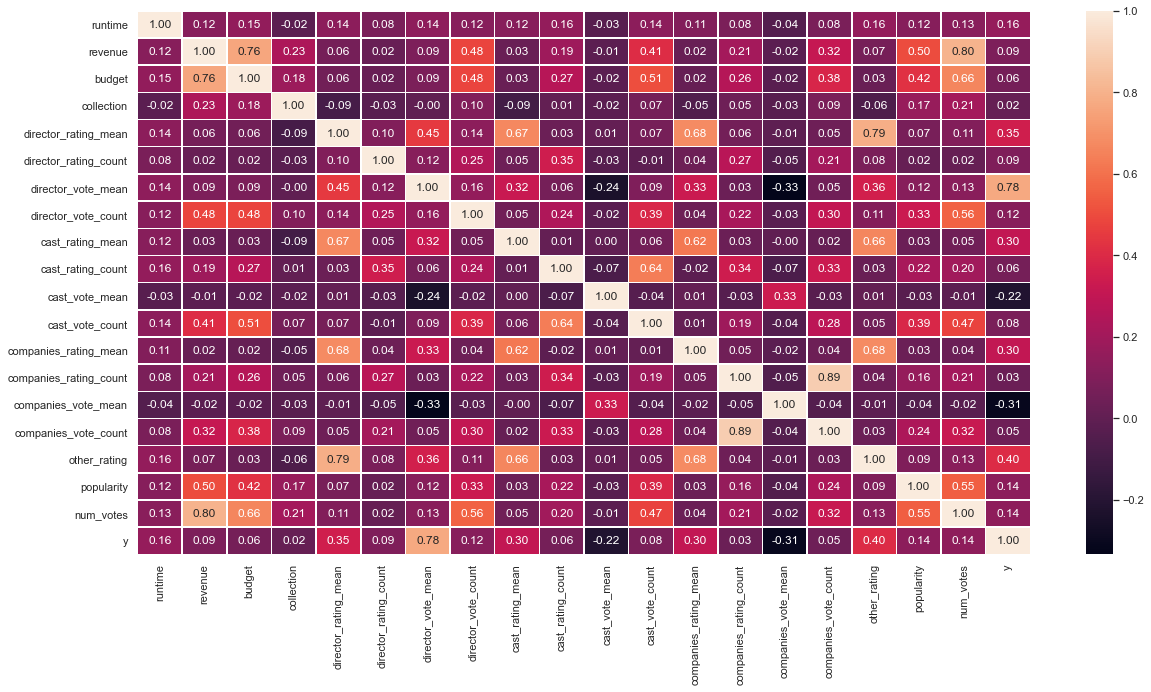

In [30]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(correlations.loc[:].corr(), annot = True, fmt = ".2f", linewidths=0.5, ax=ax) 
plt.show()

### Selected Features 
These Features do not include the 20 genres and 36 production countries. (y is the value to be predicted)

In [31]:
correlations_f = features[['date', 'runtime', 'director_rating_mean', 'director_rating_count',
                           'cast_rating_mean', 'cast_rating_count', 'companies_rating_mean', 
                           'other_rating', 'num_votes','y']]

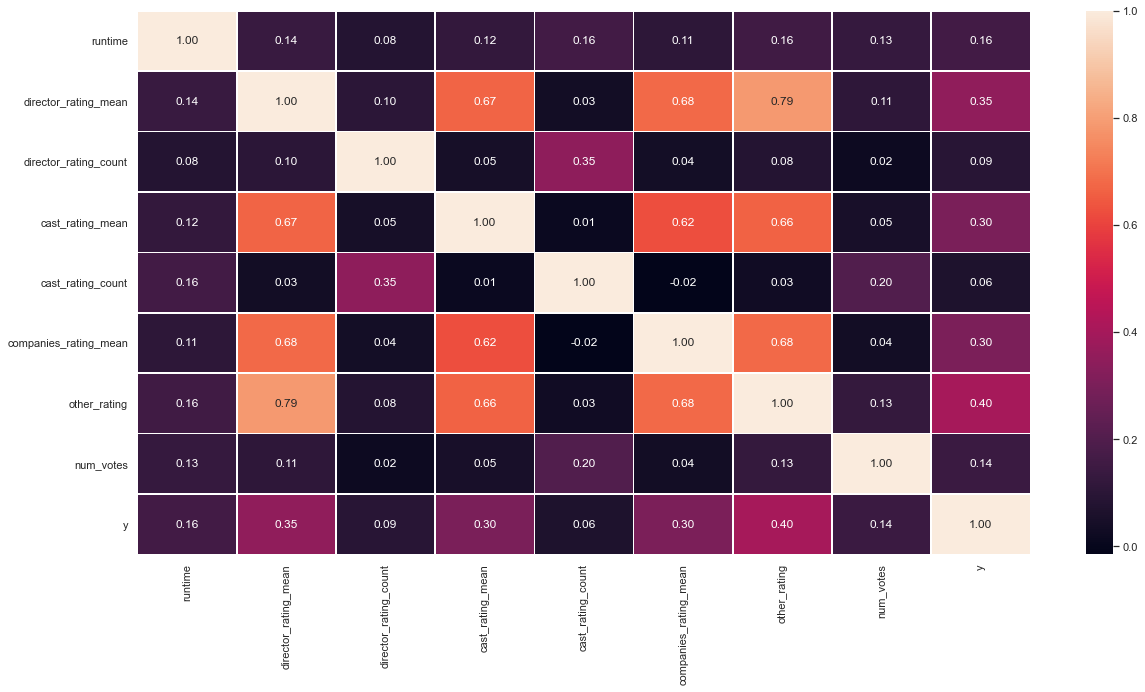

In [32]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(correlations_f.loc[:].corr(), annot = True, fmt = ".2f", linewidths=0.5, ax=ax) 
plt.show()

## Prediction Model Implementation

### Train Final Prediction Model

In [33]:
y = df_movies['Rating'].copy()
X = df_movies.copy()
Director_Dict, Cast_Dict, Companies_Dict = create_Dict(X)
final_Model = train_Model(X, y, Director_Dict, Cast_Dict, Companies_Dict)
RMSE = evaluation(X, X, y, y, Director_Dict, Cast_Dict, Companies_Dict)
print(RMSE)

0.5943471435524339


### Define Search Function

In [ ]:
def search_pred_rating(model, df):
    df_movies = df.copy()
    Director_Dict_c, Cast_Dict_c, Companies_Dict_c = Director_Dict.copy() , Cast_Dict.copy() , Companies_Dict.copy() 
    User_Rating_Dict = {}
    genre_pref = {}
    for i in genres:
        genre_pref[i] = 1
    search = True
    exit = False
    while search:
        found = False
        while not found:
            movie = input("Please enter movie name: (press 'n' to exit)")
            if movie.strip() == 'n':
                search = False
                exit = True
                break
            data = df_movies[df_movies['title'].str.contains(movie.strip())]
            if len(data) == 0:
                print("Movie not found, please try again. ")
            elif len(data)>1:
                display(data[['title', 'id', 'director']])
                ID= int(input("There is more than one movie with this name, please enter the ID. "))
                print("")
                data = data[data['id'] == ID]
                if len(data) != 0:
                    found = True
                else:
                    print("Error, try again!")
            else:
                found = True
        if exit:
            break
        y_pred = prediction(data, Director_Dict_c, Cast_Dict_c, Companies_Dict_c, model)
        tmp = 1
        for i in genre_pref.keys():
            if data[i].item() == 1:
                y_pred *= genre_pref[i]
        if y_pred > 10:
            y_pred = 10
        y_true = float(data['Rating'])
        if data.title.item() in User_Rating_Dict.keys():
            print("Your rating for this movie is: " + str(User_Rating_Dict[data.title.item()]))
            print('The average rating of ' + data.title.item() + ' is: '+ "%.1f" %y_true)
        else:
            print('Our predicted rating of ' + data.title.item() + ' is: '+ "%.1f" %y_pred)
            user_Rating = round(float(input("Please give this movie a rating from 0.0 - 10.0! ")), 1)
            data['other_rating'] = user_Rating
            if user_Rating > 8:
                  for i in genres:
                        if data[i].item() == 1:
                            tmp = 1 + 0.01 * (user_Rating - 8)
                            genre_pref[i] *= tmp
            elif user_Rating < 4:
                for i in genres:
                        if data[i].item() == 1:
                            tmp = 1 - 0.01 * (4 - user_Rating)
                            genre_pref[i] *= tmp
            else: 
                for i in genres:
                        if data[i].item() == 1:
                            tmp = 1 + 0.005 * (user_Rating - 6)
                            genre_pref[i] *= tmp
            Director_Dict_c[data.director.item()] = [round((Director_Dict_c[data.director.item()][0] + user_Rating/2)/2, 1), 
                                                   Director_Dict_c[data.director.item()][1] + 1, 
                                                   Director_Dict_c[data.director.item()][2] + user_Rating, 
                                                   Director_Dict_c[data.director.item()][3] + 1]
            for i in range(len(data.cast.item())):
                Cast_Dict_c[data.cast.item()[i]] = [round((Cast_Dict_c[data.cast.item()[i]][0] + user_Rating/2)/2, 1), 
                                                Cast_Dict_c[data.cast.item()[i]][1] + 1, 
                                                Cast_Dict_c[data.cast.item()[i]][2] + user_Rating, 
                                                Cast_Dict_c[data.cast.item()[i]][3] + 1]
            for i in range(len(data.production_companies.item())):
                a = Companies_Dict_c[data.production_companies.item()[i]][0]
                b = Companies_Dict_c[data.production_companies.item()[i]][1]
                Companies_Dict_c[data.production_companies.item()[i]] = [round((a * b + user_Rating/2)/b), 
                                                Companies_Dict_c[data.production_companies.item()[i]][1] + 1, 
                                                Companies_Dict_c[data.production_companies.item()[i]][2] + user_Rating, 
                                                Companies_Dict_c[data.production_companies.item()[i]][3] + 1]
            User_Rating_Dict[data.title.item()] = user_Rating
         
    print("Rating History:")
    for i in User_Rating_Dict:
        print(i + ": " + str(User_Rating_Dict[i]))
    return "Thank you!"

### Display results with Search Function

In [ ]:
search_pred_rating(final_Model, df_movies)